<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="Indigo" size=8px>
                  <b> Spark Foundation-Prediction Using Supervised ML</b>
                </font>
            </div>
        </td>
    </tr>
</table>

*****

## GRIP : Spark Foundation

## Name : Varshini.P

## Task 1 : Prediction using Supervised ML 

## Problem Statement: 

Predict the percentage of an student based on the no. of study hours.

### Importing Libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Access and collection:

In [2]:
#Reading the dataset from the URL link:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print('Data has been successfully imported')

Data has been successfully imported


In [4]:
df.shape #To check the number of row and columns.

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# We can the datatype and the non-null count value from data information.

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Inference**: From above summary it is observed that students studying for less number of hours are scoring less marks and 
    students studying for more number of hours has highest marks. Also the the average score and number of study hours can be infered which is around 51 and 5 respectively.

## Data Visualization: 

**Let's check the relationship between the variables:**

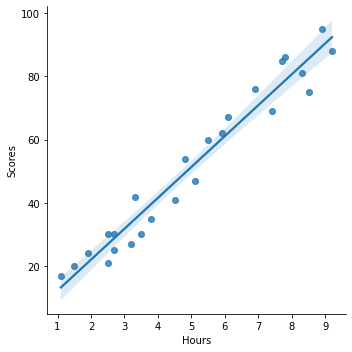

In [9]:
sns.lmplot(data=df,x='Hours',y='Scores')
plt.show()

**Inference**: From the above graph we can get to see that there is a positive linear relation between the two variables.

**Let's also check the correlation among the 2 variables:**

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Preparation:

Let us divide the data into attributes and labels:

In [11]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [12]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [13]:
y[:5]

array([21, 47, 27, 75, 30], dtype=int64)

Now let us divide the data into training & testing datasets, which will be done using sklearn built-in train_test_split method:

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (20, 1)
x_test : (5, 1)
y_train : (20,)
y_test : (5,)


## Choosing and training the model: 

In [15]:
from sklearn.linear_model import LinearRegression  
linreg=LinearRegression()
linreg.fit(x_train,y_train)
print('Training the model is completed.')

Training the model is completed.


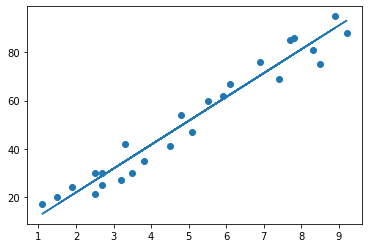

In [16]:
# Plotting the regression line
line=linreg.coef_*X+linreg.intercept_
# Plotting for test data:
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Predicting the model: 

In [17]:
y_pred = linreg.predict(x_test)

In [18]:
Data=pd.DataFrame({'actual_val':y_test,'Predicted_val':y_pred})
Data

,actual_val,Predicted_val
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [21]:
# Checking with new testing data:
hours = np.array([9.25,8.7,1.4,6.7,5.98]).reshape(-1,1)
own_pred = linreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[9.25]
 [8.7 ]
 [1.4 ]
 [6.7 ]
 [5.98]]
Predicted Score = [93.69173249 88.24087142 15.89307911 68.41955846 61.2838858 ]


In [22]:
Data=pd.DataFrame({'testing_hours':hours.reshape(-1),'Predicted_val':own_pred})
Data

,testing_hours,Predicted_val
0,9.25,93.691732
1,8.70,88.240871
2,1.40,15.893079
3,6.70,68.419558
4,5.98,61.283886


### Evaluation:

In [23]:
#Let us check for the r_square & mean absolute Percentage error values for test data:
print('The r_square value of test data:',r2_score(y_test,y_pred))
print('MAPE value',np.mean(np.abs((y_test-y_pred)/y_test)*100))

The r_square value of test data: 0.9454906892105356
MAPE value 12.568891617045661


**Inference**: As per R_square which is more than 0.9 value seems to predict the model is good also the MAPE value which is less than 20% indicates model is good.